In [480]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display
import matplotlib.ticker as ticker

In [481]:
# Import data, change column header from Sex to Gender
df = pd.read_csv('../Resources/Cleaning2/merged_events_bio.csv')
df = df.rename(columns={'Sex': 'Gender'})
df.head(5)

,Athlete_ID,Name,Age,Gender,Height(cm),Weight(kg),Sport,Country_Name,Country_Code,Year,Season,isTeamSport,Medal,Result_ID
0,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,False,na,153233
1,16809,Károly Teppert,21.0,M,NaN,NaN,Cycling Road,Hungary,HUN,1912,Summer,True,na,153234
2,43737,Andrzej Socharski,29.0,M,173.0,72.0,Shooting,Poland,POL,1976,Summer,False,na,51745
3,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7860
4,50147,Nathalie Wunderlich,21.0,F,170.0,50.0,Swimming,Switzerland,SUI,1992,Summer,False,na,7870


In [482]:
print(df.dtypes)

Athlete_ID        int64
Name             object
Age             float64
Gender           object
Height(cm)      float64
Weight(kg)      float64
Sport            object
Country_Name     object
Country_Code     object
Year              int64
Season           object
isTeamSport        bool
Medal            object
Result_ID         int64
dtype: object


In [483]:
# Remove NA's and convert "Age" column to integer data type
#df['Age'] = df['Age'].fillna(0)
#df['Age'] = df['Age'].astype(int)
#print(df.dtypes)

In [484]:
# Define the medal colors 
color_scale = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'peru'}

In [485]:
# Define dropdown menus, alphabetize sports and countries
gender_dropdown = widgets.Dropdown(
    options=['Both', 'M', 'F'],
    value='Both',
    description='Gender:')

sports = ["ALL"] + sorted(df['Sport'].unique().tolist())
sports.sort()
sport_dropdown = widgets.Dropdown(options=sports, value="ALL", description="Sport:")

countries = ["ALL"] + sorted(df['Country_Name'].unique().tolist())
countries.sort()
country_dropdown = widgets.Dropdown(options=countries, value="ALL", description='Country:')

In [486]:
# Define the callback functions
def on_gender_change(change):
    update_scatter_plot(filtered_df, change.new, sport_dropdown.value, country_dropdown.value)
    
def on_sport_change(change):
    update_scatter_plot(filtered_df, gender_dropdown.value, change.new, country_dropdown.value)
    
def on_country_change(change):
    update_scatter_plot(filtered_df, gender_dropdown.value, sport_dropdown.value, change.new)

In [487]:
# Define the function to filter the data 
def filter_data(df, gender, country=None, sport=None):
    filtered_df = df.copy()
    if gender != 'Both':
        filtered_df = filtered_df[filtered_df['Gender'] == gender]
    if country != 'ALL':
        filtered_df = filtered_df[filtered_df['Country_Name'] == country]
    if sport != 'ALL':
        filtered_df = filtered_df[filtered_df['Sport'] == sport]
    
    # filter out rows where no medal was received
    filtered_df = filtered_df[~(filtered_df['Medal'] == 'na')]
        
    return filtered_df

In [494]:
# Add hover labels

#def medal_label_formatter(val, pos):
#    """Function to format the label of each bar in the medal bar chart."""
#    gold_count = int(val[1])
#    silver_count = int(val[2])
#    bronze_count = int(val[0])
#    total_count = gold_count + silver_count + bronze_count
#    return f"Gold: {gold_count}\nSilver: {silver_count}\nBronze: {bronze_count}\nTotal: {total_count}"

In [500]:
# Define the function to update the medal bar plot
def update_plot(gender, sport, country):
    filtered_df = filter_data(df, gender, country, sport)
    filtered_df = filtered_df[filtered_df['Age'].notnull()] # Filter out rows where Age is null
    filtered_df['Age'] = filtered_df['Age'].astype(int) # Convert Age column to integer
    medal_counts = pd.pivot_table(filtered_df, index=['Age'], columns=['Medal'], values='Name', aggfunc='count', fill_value=0)
    print(medal_counts)
    medal_counts.plot(kind='bar', stacked=True, color=[color_scale.get(x, '#333333') for x in ['Gold', 'Silver', 'Bronze']])
    plt.xlabel('Age')
    plt.ylabel('Medal Count')
    plt.legend(title='Medal Count by Age', labels=['Gold', 'Silver', 'Bronze'])
   #    plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    plt.show()

In [501]:
# Define the function to reset the dropdown menus
def reset_dropdowns():
    gender_dropdown.value = 'Both'
    sport_dropdown.value = 'ALL'
    country_dropdown.value = 'ALL'

In [502]:
# Register the callback functions
gender_dropdown.observe(on_gender_change, names='value')
sport_dropdown.observe(on_sport_change, names='value')
country_dropdown.observe(on_country_change, names='value')

In [505]:
# Display the dropdown menus
display(gender_dropdown)
display(sport_dropdown)
display(country_dropdown)

Dropdown(description='Gender:', index=2, options=('Both', 'M', 'F'), value='F')

Dropdown(description='Sport:', index=98, options=('3x3 Basketball', 'ALL', 'Aeronautics', 'Alpine Skiing', 'Al…

Dropdown(description='Country:', index=697, options=(' Afghanistan', ' Albania', ' Albania  Australia', ' Alba…

Medal  Bronze  Gold  Silver
Age                        
16          0     1       0
18          0     0       2
19          2     5       1
20          0     3       2
21         10     3       3
22          2     1       4
23          5     4       3
24          6     3       1
25          7     4       4
26          3     1       2
27          3     2       4
28          4     3       6
29          1     1       2
30          3     4       1
31          2     3       3
32          0     3       2
34          0     2       1
35          0     0       1
36          5     0       2
37          0     0       3
38          1     2       0
39          1     0       0
40          1     0       0
43          0     1       0


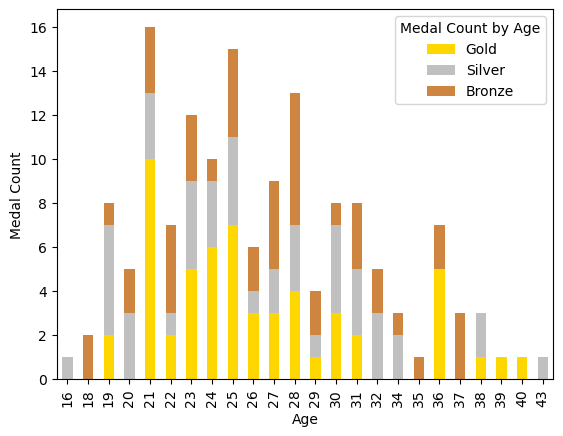

In [506]:
# Display the initial scatter plot
filtered_df = df.copy()
update_plot(gender_dropdown.value, sport_dropdown.value, country_dropdown.value)